In [53]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

py39
/Users/vbloise/miniconda3/envs/py39/bin/python
3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:27:05) 
[Clang 12.0.1 ]
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


In [54]:
from tsplib import readerTSP, plotterTSP
import networkx as nx

In [89]:
reader = readerTSP.ReaderTSP()
plotter = plotterTSP.PlotterTSP(None)

iterator = iter(reader.instances_generator())
next(iterator)
instance = next(iterator)
n_points, positions, distance_matrix, name, optimal_tour = instance
print(name)

ch130


In [101]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import numpy as np

def add_optimal_edges(G, opt_tour):
    prev = None
    first = None
    for node in opt_tour:
        if prev == None:
            first = prev = node
            continue

        G.add_edge(prev, node)
        prev = node
    G.add_edge(first, prev)

def add_minimum_spanning_tree(G, dist_matrix):
    X = csr_matrix(distance_matrix)

    

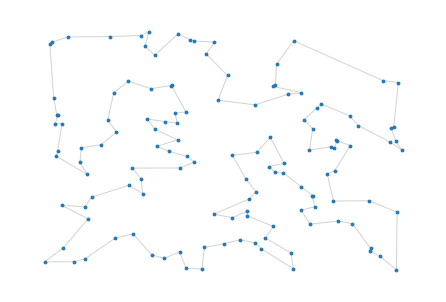

In [96]:
#G = nx.from_edgelist(positions)

G = nx.Graph()
node = 0
for position in positions:
    G.add_node(node, pos=position)
    node += 1

G_opt = G.copy()
add_optimal_edges(G_opt, optimal_tour)

#G = nx.random_geometric_graph(20, radius=0.4, seed=3)
#pos = nx.spring_layout(G)
pos = nx.get_node_attributes(G, 'pos')

options = {'node_size': 8, 'edge_color': 'lightgray'}
#print(options)
nx.draw(G_opt, pos, **options)
#nx.draw_networkx_nodes(G, pos, node_size=5)
#nx.draw_networkx_edges(G, pos, node_size=5)


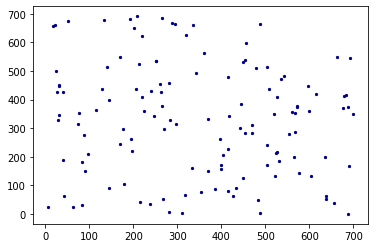

In [91]:
plotter.set_figure(1)
plotter.plot_points(positions)

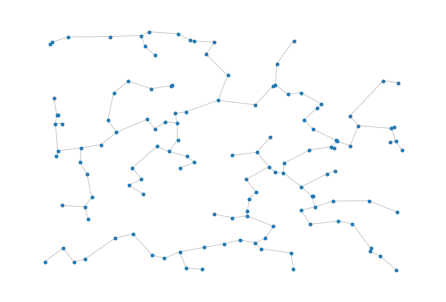

In [137]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

X = np.triu(distance_matrix,0)
Tcsr = minimum_spanning_tree(csr_matrix(X))

G_mst = G.copy()
for edge in np.argwhere(Tcsr>0):
    G_mst.add_edge(edge[0], edge[1])

nx.draw(G_mst, pos, **options)

#filterX = X[X > 0]

array([[  0,  40],
       [  1,  49],
       [  1, 117],
       [  2,  82],
       [  2, 113],
       [  3,  34],
       [  4,  10],
       [  5,  54],
       [  5, 101],
       [  6,  96],
       [  7, 107],
       [  8,  51],
       [  8,  56],
       [  9,  13],
       [ 10,  75],
       [ 11,  86],
       [ 12,  66],
       [ 13,  66],
       [ 13, 121],
       [ 14,  23],
       [ 14,  28],
       [ 15,  44],
       [ 15, 127],
       [ 16,  30],
       [ 16,  33],
       [ 17,  20],
       [ 17,  45],
       [ 17, 107],
       [ 18,  26],
       [ 18,  42],
       [ 19,  45],
       [ 19,  92],
       [ 20,  32],
       [ 21,  36],
       [ 22,  46],
       [ 22, 121],
       [ 23, 115],
       [ 24,  31],
       [ 24,  47],
       [ 24,  97],
       [ 25,  96],
       [ 26,  30],
       [ 26,  99],
       [ 27, 114],
       [ 28,  88],
       [ 29,  58],
       [ 29,  82],
       [ 31,  83],
       [ 31, 112],
       [ 34,  53],
       [ 34, 117],
       [ 35,  83],
       [ 36,

In [134]:
for point in Tcsr.toarray():
    print(point)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 37.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 40.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. 

In [59]:
#distance_matrix[0]
optimal_tour

array([  0,   1, 241, 242, 243, 240, 239, 238, 237, 236, 235, 234, 233,
       232, 231, 230, 245, 244, 246, 249, 250, 229, 228, 227, 226, 225,
       224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212,
       211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199,
       143, 144, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188,
       187, 186, 185, 184, 183, 182, 181, 180, 175, 179, 178, 149, 177,
       176, 150, 151, 155, 152, 154, 153, 128, 127, 126, 125, 124, 123,
       122, 121, 120, 119, 118, 156, 157, 158, 159, 174, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 106, 105,
       104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88, 108, 107, 109, 110, 113, 112, 111,  87,  86,
        83,  82,  81,  80,  79,  78,  77,  76,  74,  75,  73,  72,  71,
        70,  69,  66,  68,  67,  57,  56,  55,  54,  53,  52,  51,  50,
        49,  48,  47,  46,  45,  44,  43,  58,  62,  63,  65,  6